# Analysis of Punjab vs Mumbai Indians


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()



In [3]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

# Removing duplicates

In [5]:
# Check for Duplicate Rows 
duplicated1=data.duplicated()
duplicated2=deliveries.duplicated()
deliveries.drop_duplicates(inplace=True)
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
# Check for Data Set Deliveries
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [6]:
# Check the Shape of both the CSV files

print('Rows and columns of Matches Data Set is',data.shape)
print('Rows and columns of Deliveries Data Set is',deliveries.shape)


Rows and columns of Matches Data Set is (756, 18)
Rows and columns of Deliveries Data Set is (179055, 21)


In [7]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#Chek for Delivery info
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [9]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

In [10]:
# Check for Missing Values for Matches
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
# Check for Columns Where there is NULL Values first Check Winner there are 4 Rows as there is no Result we will put NUll values to 0
data[data['winner'].isnull()]
data['winner'].fillna('NoWinner', inplace=True)

In [12]:
# Check for Player_of_match as there is no Result put NULL values as NoPlayerMatch
data[data['player_of_match'].isnull()]
data['player_of_match'].fillna('NoPlayerMatch', inplace=True)

In [13]:
# Check for City there are 7 NULL values as City doest have significance for Analysis we will replace Null values to Unknow
data[data['city'].isnull()]
data['city'].fillna('Unknown', inplace=True)

In [14]:
# Check for Umpire 1 & Umpire 2 -- Putting Null value to some Umpire as this doesnt have significance
data['umpire1'].fillna('Unknown', inplace=True)
data['umpire2'].fillna('Unknown', inplace=True)

In [15]:
# Umpire 3 has 637 Null Values and doesnt have much signifiance we will Drop this Columns from Dataframe
data=data.drop(['umpire3'],axis=1)


In [14]:
# Check for matches if there is any NULL values Remaining
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [15]:
# Check for Missing values for Deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [16]:
# For More Analysis ,let us Merge these two Dataframe
# Check for Any Null Values
data_merge=pd.merge(data,deliveries,left_on='id',right_on='match_id',how='inner')
data_merge.isnull().sum()

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
f

# For Deliveries Dataframe we have NULL values for Player_dismissed,dismissial_kind,fielder as these can be remain intact as there is Wickets and player haven taken runs or it is a dot ball When Doing modelling we can considerd Null Values to replace some values

# Check for HeatMaps:
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. A gradient color scale is used to represent the values of the quantitative variable. The correlation between two random variables is a number that runs from -1 through 0 to +1 and indicates a strong inverse relationship, no relationship, and a strong direct relationship, respectively.

<AxesSubplot:>

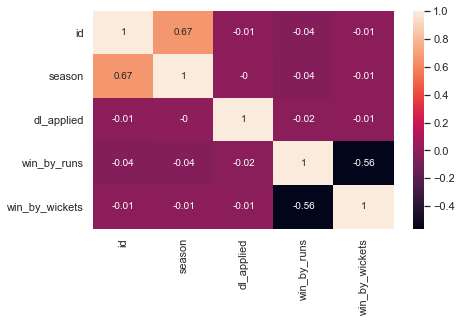

In [17]:
corelation_matrix=data.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

<AxesSubplot:>

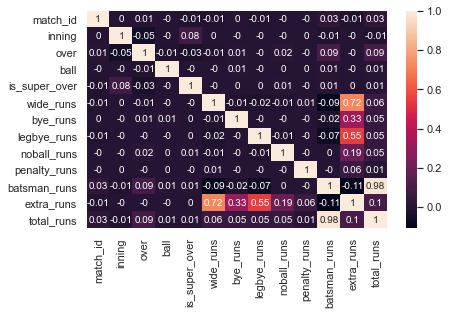

In [18]:
corelation_matrix=deliveries.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

# Wide_runs and extra_runs are highly corerealted ,When builiding Model we can remove one of the variable

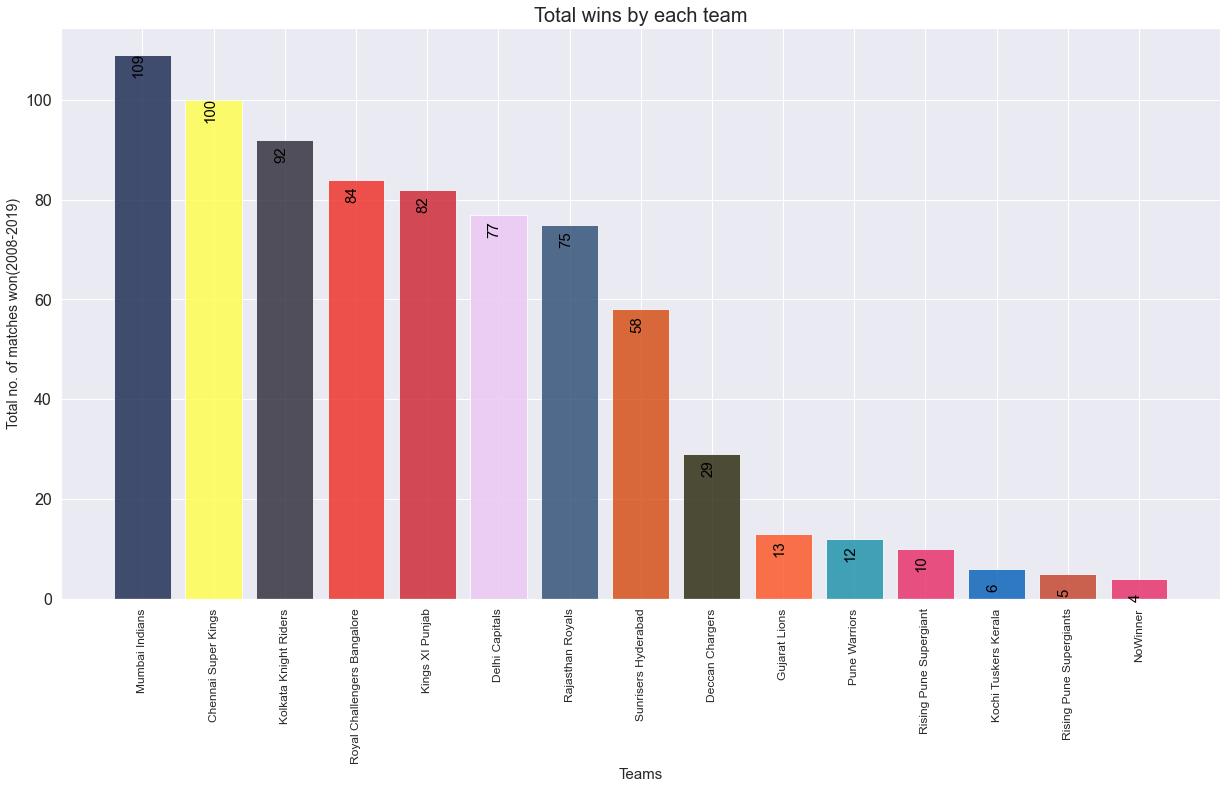

In [19]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# MOM OF AWARDS

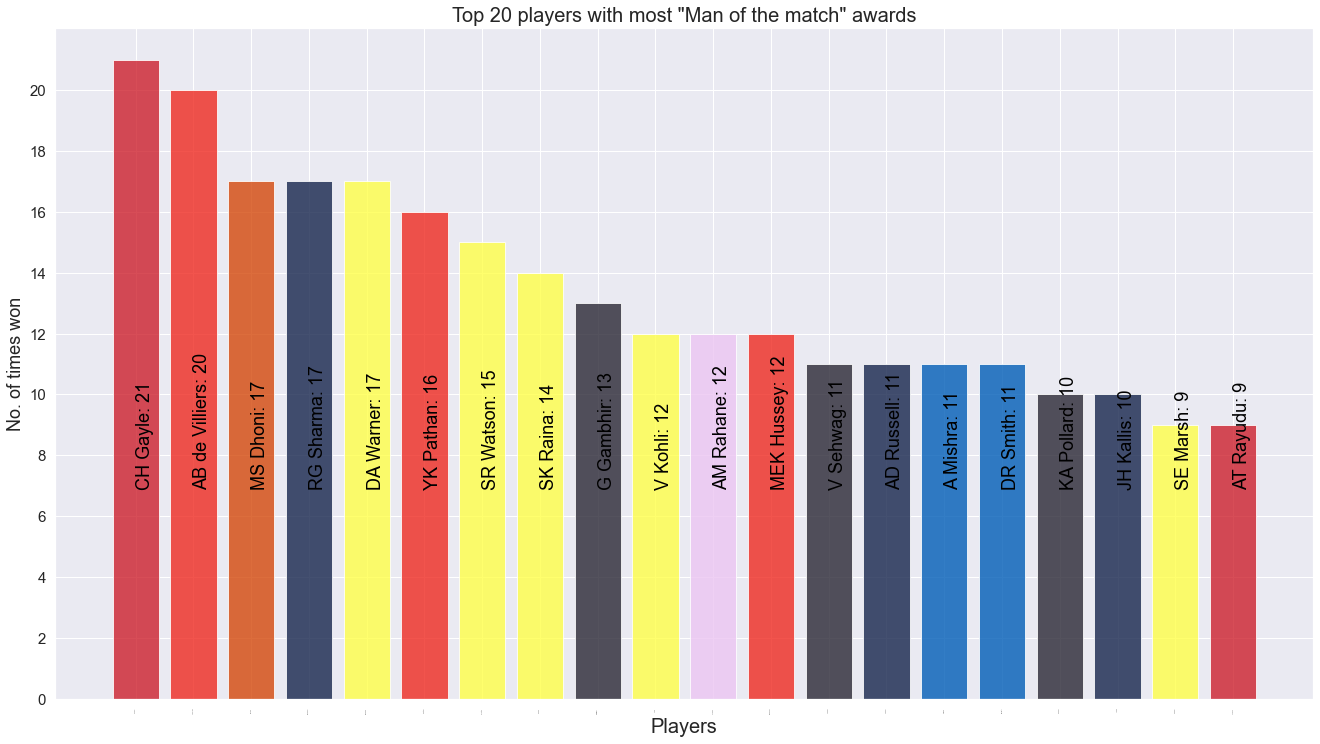

In [20]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [21]:
# Filter out Data for Punjab & MI 
pbrb=data[np.logical_or(np.logical_and(data['team1']=='Kings XI Punjab',data['team2']=='Mumbai Indians'),np.logical_and(data['team2']=='Kings XI Punjab',data['team1']=='Mumbai Indians'))]
# Combined for Punjab & MI
pbrb_d= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Kings XI Punjab',deliveries['bowling_team']=='Mumbai Indians'),np.logical_and(deliveries['bowling_team']=='Kings XI Punjab',deliveries['batting_team']=='Mumbai Indians'))]

In [22]:
# Check for any Duplicate Rows
duplicate = pbrb[pbrb.duplicated()]
duplicate
duplicate_D = pbrb_d[pbrb_d.duplicated()]
duplicate_D

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder]
Index: []

[0 rows x 21 columns]

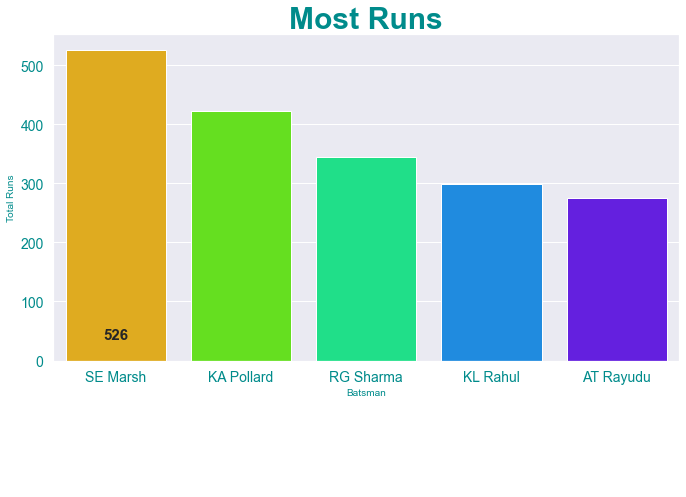

In [24]:
# Most Runs done by Players of both Teams 

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = pbrb_d.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Most Wickets Taken by Player from both the Teams

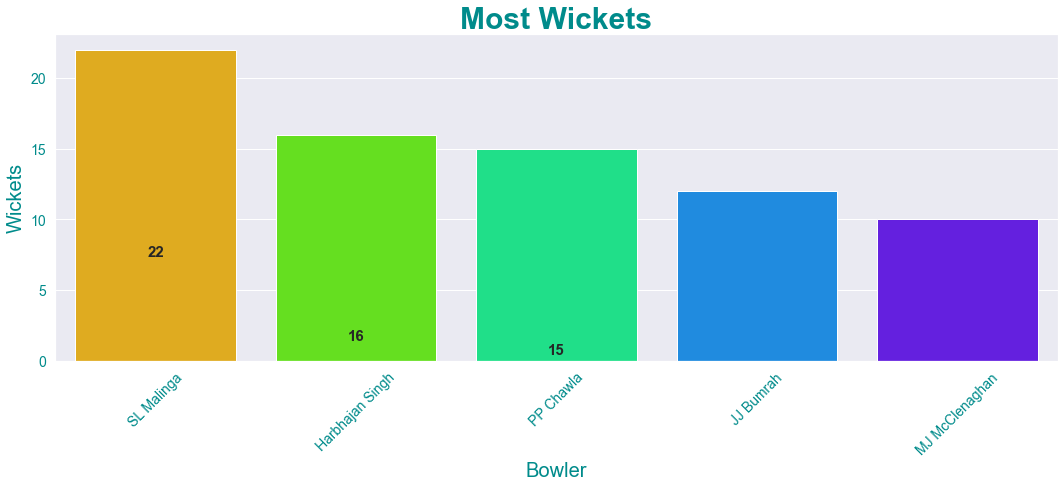

In [25]:
#the top Ten blower of 

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = pbrb_d[(pbrb_d['player_dismissed'].notnull()) & (~pbrb_d['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


# Head to Head between MI vs Punjab

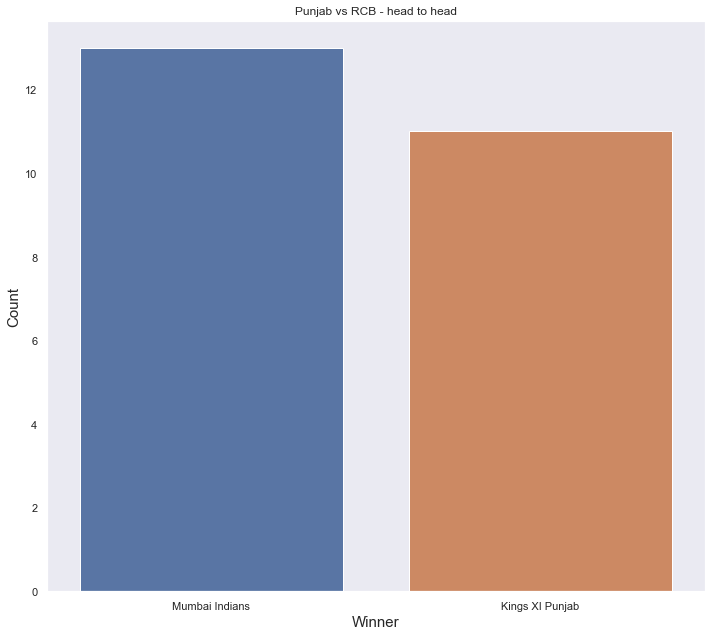

In [26]:
# DC VS RR head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(pbrb['winner'],order=pbrb['winner'].value_counts().index)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('Punjab vs RCB - head to head')
plt.show()

In [27]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            

In [28]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Kings XI Punjab
field_count = 29
bat_count = 6
Win %age if fielding is choosen = 82.85714285714286
Win %age if batting is choosen = 17.142857142857142




In [30]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Mumbai Indians
field_count = 31
bat_count = 25
Win %age if fielding is choosen = 55.35714285714286
Win %age if batting is choosen = 44.642857142857146




# In Head to head Mumbai chances of Winning is more then Punjab

# Will See that Matches are Placed Outside India ,So to Check what is Record of Winning the Match Outside India i.e UAE

In [30]:
data['venue'].nunique()

41

In [31]:
# Todays Match Played in Sharjah Stadium Will Check Hows Team Performed in this Stadium.
Venue =['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'M. A. Chidambaram Stadium', 'Feroz Shah Kotla Ground',
       'M. Chinnaswamy Stadium', 'Rajiv Gandhi Intl. Cricket Stadium',
       'IS Bindra Stadium', 'ACA-VDCA Stadium']

UAE_Winner=data.loc[(data['venue']=='Dubai International Cricket Stadium')]
UAE_Winner.groupby('winner').count()['result'].reset_index()


winner  result
0          Chennai Super Kings       2
1               Delhi Capitals       1
2              Kings XI Punjab       1
3  Royal Challengers Bangalore       1
4          Sunrisers Hyderabad       2

# In Dubai, Punjab has chances of winning the Match

In [41]:
# Which type Of Bowler Quniton De Kock get out
# Check for Name in Dataframe

pbrb_d[pbrb_d['batsman'].str.contains('Kock')].head()
# Name is Q de Kock
Quniton=pbrb_d[ (pbrb_d['batsman']=='Q de Kock') & (pbrb_d['player_dismissed'].notnull())]
Dismissial=Quniton.groupby(['match_id','bowler']).count()['dismissal_kind'].reset_index()

match_id          bowler  dismissal_kind
0     11145  Mohammed Shami               1
1     11315        R Ashwin               1

# De Kock gets Out by Fast & Spin Equally Match played Against Punjab

In [44]:
# Check For Full DataFrame ( Combination of Both )
team_Exclude= ['Kings XI Punjab']
Quniton=data_merge[ (data_merge['batsman']=='Q de Kock') & (data_merge['player_dismissed'].notnull()) ]
Dismissial=Quniton.groupby(['match_id','bowler']).count()['dismissal_kind'].reset_index()
Dismissial

match_id           bowler  dismissal_kind
0        402         AB Dinda               1
1        405          P Kumar               1
2        414        MM Sharma               1
3        469        KV Sharma               1
4        473      CJ Anderson               1
5        480         PV Tambe               1
6        485         UT Yadav               1
7        489         DW Steyn               1
8        495         MA Starc               1
9        561        KV Sharma               1
10       565        IC Pandey               1
11       571        YS Chahal               1
12       578       AD Russell               1
13       587        SR Watson               1
14       593   MJ McClenaghan               1
15       599      DS Kulkarni               1
16       602       AD Russell               1
17       607        S Kaushik               1
18       612       MP Stoinis               1
19       618     MC Henriques               1
20       623        KH Pandya               2
21       625         AB Dinda               1
22       628          BB Sran               1
23       632        YS Chahal               1
24      7896        PP Chawla               1
25      7901         R Ashwin               1
26      7904          D Short               1
27      7907   MJ McClenaghan               1
28      7917         DJ Bravo               1
29      7922    Kuldeep Yadav               1
30      7924   MJ McClenaghan               1
31     11139         I Sharma               1
32     11143        YS Chahal               1
33     11145   Mohammed Shami               1
34     11151        DL Chahar               1
35     11310           S Kaul               1
36     11315         R Ashwin               1
37     11318         J Archer               1
38     11322            M Ali               1
39     11327          S Gopal               1
40     11335        DL Chahar               1
41     11338        SP Narine               1
42     11347        P Krishna               1
43     11412  Harbhajan Singh               1
44     11415        SN Thakur               1

# As Average De Kock get Mostly out against Spinner 

In [46]:
# Will Check for Dubai Venue

# Check for CSK for venue Sharjah ,how Many Wickets they will Take

dismissed=data_merge[ (data_merge['batsman']=='Q de Kock') & (data_merge['player_dismissed'].notnull())  &  (data_merge['venue']=='Dubai International Cricket Stadium')]
Dismissial=dismissed.groupby(['match_id','bowler']).count()['dismissal_kind'].reset_index()
Dismissial

match_id     bowler  dismissal_kind
0       469  KV Sharma               1

# In Dubai,Also Spinner Gets De Kock Wicket

In [57]:
# How many Wickets KXIP will loose in Power Play

import numpy as np
PP_DC=pbrb_d[(pbrb_d['bowling_team']=='Kings XI Punjab') & ( pbrb_d['player_dismissed'].notnull())  ]
#df=PP_DC.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=PP_DC.loc[PP_DC['over'] <=6]
df=df.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average PP KXIP looses in Powerplay',round(np.mean(df['player_dismissed']),2))
print('Average PP KXIP looses in Powerplay',np.median(df['player_dismissed']))


Average PP KXIP looses in Powerplay 1.74
Average PP KXIP looses in Powerplay 2.0


In [58]:
# Just to Check What is Perfroamnce of PP of DC against other Teams
PP_DC=data_merge[(data_merge['bowling_team']=='Kings XI Punjab') & ( data_merge['player_dismissed'].notnull())  ]
#df=PP_DC.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=PP_DC.loc[PP_DC['over'] <=6]
df=df.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average PP KXIP looses in Powerplay',round(np.mean(df['player_dismissed']),2))
print('Average PP KXIP looses in Powerplay',np.median(df['player_dismissed']))

Average PP KXIP looses in Powerplay 1.79
Average PP KXIP looses in Powerplay 2.0


In [59]:
# Check in Dubai Stadium 
PP_DC=data_merge[(data_merge['bowling_team']=='Kings XI Punjab') & ( data_merge['player_dismissed'].notnull()) & (data_merge['venue']=='Dubai International Cricket Stadium')  ]
#df=PP_DC.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=PP_DC.loc[PP_DC['over'] <=6]
df=df.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average PP KXIP looses in Powerplay',round(np.mean(df['player_dismissed']),2))
print('Average PP KXIP looses in Powerplay',np.median(df['player_dismissed']))

Average PP KXIP looses in Powerplay 4.0
Average PP KXIP looses in Powerplay 4.0


In [ ]:
# KXIP looses around 2 Wickets in PowerPlay
# KXIP looses More Wickets in Dubai as compared to Other grounds

In [60]:
pbrb_d[pbrb_d['batsman'].str.contains('Rahul')].head(1)

match_id  inning     batting_team    bowling_team  over  ball  \
158275      7927       1  Kings XI Punjab  Mumbai Indians     1     1   

         batsman non_striker          bowler  is_super_over  ...  bye_runs  \
158275  KL Rahul    CH Gayle  MJ McClenaghan              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
158275            0            0             0             0           0   

        total_runs  player_dismissed dismissal_kind fielder  
158275           0               NaN            NaN     NaN  

[1 rows x 21 columns]

<AxesSubplot:>

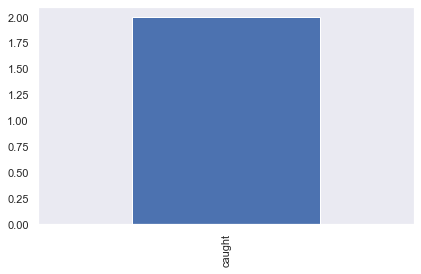

In [61]:
# How Will KL Rahul Get Out

dismissed_Sharma=pbrb_d[(pbrb_d['player_dismissed'].notnull()) & ( pbrb_d['batsman']=='KL Rahul' )  ]
Check1=dismissed_Sharma.groupby(['match_id','dismissal_kind']).count().reset_index()
#Check2=Check1.groupby('match_id').count()['dismissal_kind'].reset_index()
Check1['dismissal_kind'].value_counts().plot(kind='bar')

# KL rahul mostly Get Caught

<AxesSubplot:>

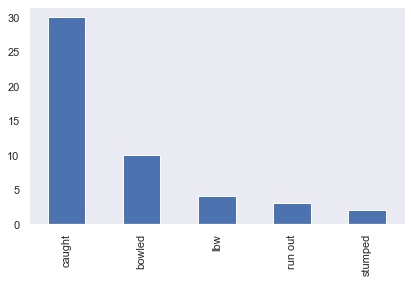

In [63]:
Team_Exclude =['Mumbai Indians']
dismissed_Sharma=data_merge[(data_merge['player_dismissed'].notnull()) & ( ~data_merge['batting_team'].isin( Team_Exclude) ) & ( data_merge['batsman']=='KL Rahul' )  ]
Check1=dismissed_Sharma.groupby(['match_id','dismissal_kind']).count().reset_index()
#Check2=Check1.groupby('match_id').count()['dismissal_kind'].reset_index()
Check1['dismissal_kind'].value_counts().plot(kind='bar')

# Caught with Other Teams also

<AxesSubplot:>

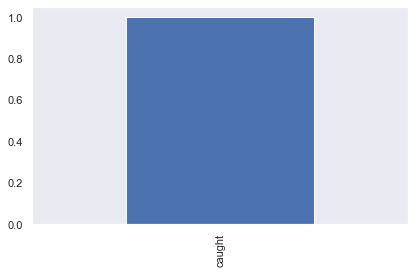

In [64]:
# Check With Dubai Stadium

Team_Exclude =['Mumbai Indians']
dismissed_Sharma=data_merge[(data_merge['player_dismissed'].notnull()) & ( ~data_merge['batting_team'].isin( Team_Exclude) ) & ( data_merge['batsman']=='KL Rahul' ) & (data_merge['venue']=='Dubai International Cricket Stadium') ]
Check1=dismissed_Sharma.groupby(['match_id','dismissal_kind']).count().reset_index()
#Check2=Check1.groupby('match_id').count()['dismissal_kind'].reset_index()
Check1['dismissal_kind'].value_counts().plot(kind='bar')

In [65]:
# How Many Wickets Fall During Match
dismissed=pbrb_d[(pbrb_d['player_dismissed'].notnull())]
Check=dismissed.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average Wickets fallen in a Match between two teams KXIP vs MI ',np.mean(Check['player_dismissed']))

Average Wickets fallen in a Match between two teams KXIP vs MI  12.25


In [18]:
# Check in Dubai Stadium
dismissed=data_merge[(data_merge['player_dismissed'].notnull()) & (data_merge['venue']=='Dubai International Cricket Stadium') ]
Check=dismissed.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average Wickets fallen in a Dubai venue is ',np.mean(Check['player_dismissed']))

Average Wickets fallen in a Dubai venue is  11.285714285714286
